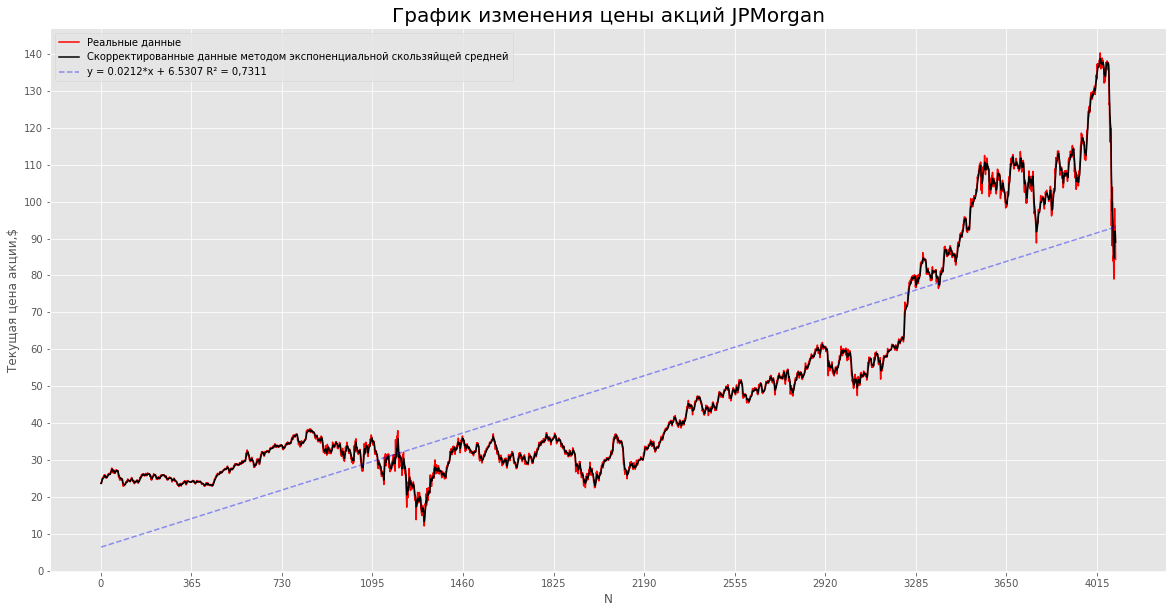

In [20]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
import math 
import csv




df = pd.read_csv("JPMorgan33.csv", sep = ",")
B=df.Price[0:4090]

#EMA- экспоненциальная взвешенная скользящая средняя.
EMA=[]
a=B[0]
for i in range(1,4090,1):
    
    EMA.append(a)
    a=(1/3)*B[i]+(2/3)*a
    
EMA.append(a)
    
    
A=df.N[0:4090]



Q=df.N[0:4090]

fig  ,ax = plt.subplots(figsize=(20, 10))
ax.plot(Q,B, linestyle='-', color='Red', marker='', label='Реальные данные', )

ax.plot(A,EMA, linestyle='-', color='black', marker='', label='Cкорректированные данные методом экспоненциальной скользяйщей средней', )

x=Q
Y=y = coef_b*x + coef_a

ax.plot(x,Y, linestyle='--', color='blue', alpha=0.4, label='y = 0.0212*x + 6.5307 R² = 0,7311')

ax.set_title('График изменения цены акций JPMorgan',fontsize=20)


ax.set_xlabel("N")
ax.set_ylabel("Текущая цена акции,$")
ax.legend(loc='best')

ax.set_xticks(np.arange(0,4090,365))
ax.set_yticks(np.arange(0,145,10))



fig.savefig('./graf1.png')



In [21]:
#МНК для исходных данных
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array([]).reshape((-1, 1))
y = np.array([])

df = pd.read_csv("JPMorgan33.csv", sep = ",")
B=df.N[0:4090]
A=df.Price[0:4090]

for i in range(0,4090,1):
    x=np.append(x,B[i]).reshape((-1, 1))

for i in range(0,4090,1):
    y=np.append(y,A[i])

model = LinearRegression()
model.fit(x, y)



coef_deter = model.score(x, y)
print(coef_deter)

coef_a=model.intercept_
coef_b=model.coef_
print( coef_a)
print( coef_b)

0.7310521377017808
6.530717686676617
[0.02116976]

0.7310519607003769
6.530712700723356
[0.02116976]

0.7310519607003769
6.530712700723356
[0.02116976]


In [65]:
#Cтроим аддитивную модель


SMark=[]
for i in range (0,4090,1):
    SMark.append(A[i]-EMA[i])

        


sum1=SMark[0]
sum2=SMark[1]
sum3=SMark[2]
sum4=SMark[3]
sum5=SMark[4]
for i in range(5,4090,1):
    if((i-5)%5==0):
        sum1+=SMark[i]
    if((i-5)%5==1):
        sum2+=SMark[i]
    if((i-5)%5==2):
        sum3+=SMark[i]
    if((i-5)%5==3):
        sum4+=SMark[i]
    if((i-5)%5==4):
        sum5+=SMark[i]

avgsum1=sum1/818
avgsum2=sum2/818
avgsum3=sum3/818
avgsum4=sum4/818
avgsum5=sum5/818

coravgsum1=avgsum1-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
coravgsum2=avgsum2-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
coravgsum3=avgsum3-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
coravgsum4=avgsum4-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
coravgsum5=avgsum5-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)

zero=coravgsum1+coravgsum2+coravgsum3+coravgsum4+coravgsum5
#print(zero)

#SMark- оценка сезонной компоненты
#sum(i)-сумма оценок сезонных компонент для каждого дня недели
#avgsum(i)-средняя от sum(i)
#coravgsum(i)-скорректированная среднняя sum(i)

#YS=Т+Е в аддитивной модели
YS=[]

for i in range(0,4090,1):
    if((i-5)%5==0):
        YS.append(A[i]-coravgsum1)
    if((i-5)%5==1):
        YS.append(A[i]-coravgsum2)
    if((i-5)%5==2):
        YS.append(A[i]-coravgsum3)
    if((i-5)%5==3):
        YS.append(A[i]-coravgsum4)
    if((i-5)%5==4):
        YS.append(A[i]-coravgsum5)
#print(YS)
        

    
#МНК для YS
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array([]).reshape((-1, 1))
y = np.array([])

df = pd.read_csv("JPMorgan33.csv", sep = ",")
B=df.N[0:4090]


for i in range(0,4090,1):
    x=np.append(x,B[i]).reshape((-1, 1))

for i in range(0,4090,1):
    y=np.append(y,YS[i])

model = LinearRegression()
model.fit(x, y)


YScoef_deter = model.score(x, y)
#print(YScoef_deter)

YScoef_a=model.intercept_

YScoef_b=model.coef_[0]


#Считаем значения Т-трендовой составляющей

T=[]
for i in range(1,4091,1):
    T.append(YScoef_a+YScoef_b*i)
#print(T)

#Находим случайную составляющую E

E=[]

for i in range(0,4090,1):
    E.append(YS[i]-T[i])
#print(E)
#Находим прогнозные значения по аддитивной модели ряда
TS=[]
for i in range(0,4090,1):
    if((i-5)%5==0):
        TS.append(T[i]+coravgsum1)
    if((i-5)%5==1):
        TS.append(T[i]+coravgsum2)
    if((i-5)%5==2):
        TS.append(T[i]+coravgsum3)
    if((i-5)%5==3):
        TS.append(T[i]+coravgsum4)
    if((i-5)%5==4):
        TS.append(T[i]+coravgsum5)
#print(TS)







0.7310521377017808


In [ ]:
#